In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\netflix_titles (2).csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Analysis

### 1. What are the number of netflix titles released per year?

In [5]:
title_per_year = df.groupby("release_year")["title"].count().reset_index()

title_per_year

,release_year,title
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


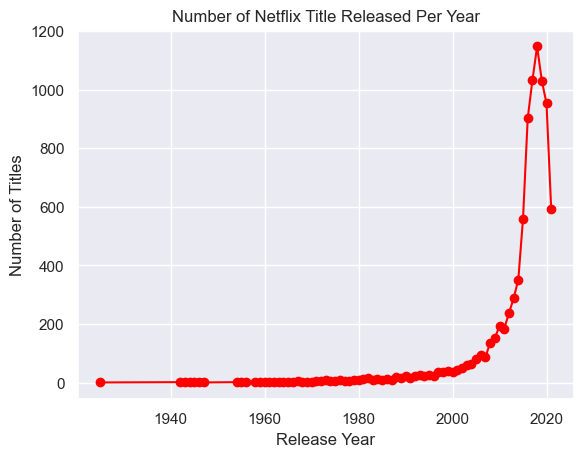

In [6]:
#create a line plot

plt.plot(title_per_year["release_year"], title_per_year["title"], color="red", marker="o")
plt.title("Number of Netflix Title Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

### 2. Distribution of Movies and TV Shows

In [7]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [8]:
type_counts = df["type"].value_counts()

In [9]:
type_counts.index

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [10]:
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

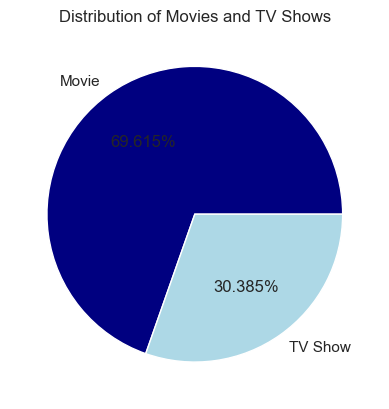

In [11]:
#create a pieplot

plt.pie(type_counts, labels=type_counts.index, autopct='%1.3f%%', colors=["navy", "lightblue"])
plt.title("Distribution of Movies and TV Shows")
plt.show

### 3. Number of Titles per ratings

In [12]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [13]:
df["rating"] = df["rating"].replace({"74 min":"Unknown", "84 min":"Unknown", "66 min":"Unknown"})

In [14]:
rating_count = df["rating"].value_counts()

In [15]:
rating_count.values

array([3207, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3,    3,    3])

In [16]:
rating_count.index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'Unknown', 'UR'],
      dtype='object', name='rating')

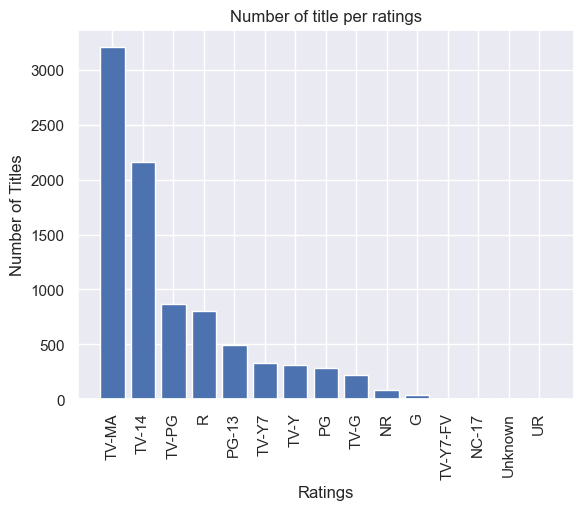

In [17]:
#create a barplot

plt.bar(rating_count.index, rating_count.values)
plt.xticks(rotation=90)
plt.title("Number of title per ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Titles")
plt.show()

### 4. Histogram presentation of netflix titles released per year

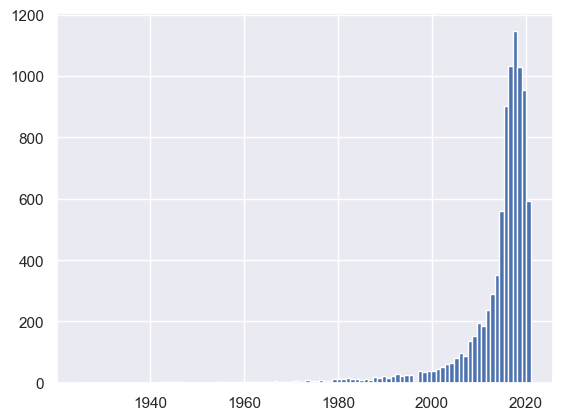

In [18]:
plt.hist(df["release_year"], bins=100)

plt.show()

### 5. Top 10 actors that have featured the most in netflix titles over the years

In [19]:
df["cast"].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [20]:
all_cast = df["cast"].dropna().str.split(',').explode().str.strip()

In [21]:
all_cast

1                  Ama Qamata
1                 Khosi Ngema
1               Gail Mabalane
1              Thabang Molaba
1            Dillon Windvogel
                ...          
8806         Manish Chaudhary
8806             Meghna Malik
8806            Malkeet Rauni
8806           Anita Shabdish
8806    Chittaranjan Tripathy
Name: cast, Length: 64126, dtype: object

In [22]:
all_cast.value_counts()

cast
Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: count, Length: 36439, dtype: int64

In [23]:
#top 10 actors

cast_count = all_cast.value_counts().head(10)

cast_count

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

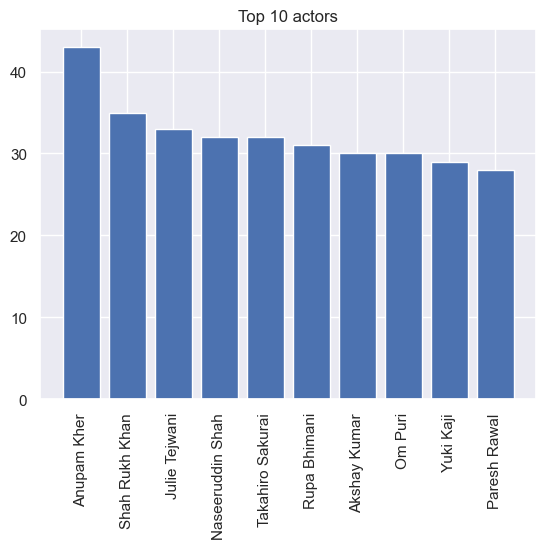

In [24]:
#create a bar plot

plt.bar(cast_count.index, cast_count.values)
plt.title("Top 10 actors")
plt.xticks(rotation=90)
plt.show()

### 6. The Relationship between Movies and Tv Shows released per year

In [25]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [26]:
release_year_by_type = df.groupby(["release_year", "type"]).size().unstack(fill_value=0).reset_index()

release_year_by_type

type,release_year,Movie,TV Show
0,1925,0,1
1,1942,2,0
2,1943,3,0
3,1944,3,0
4,1945,3,1
...,...,...,...
69,2017,767,265
70,2018,767,380
71,2019,633,397
72,2020,517,436


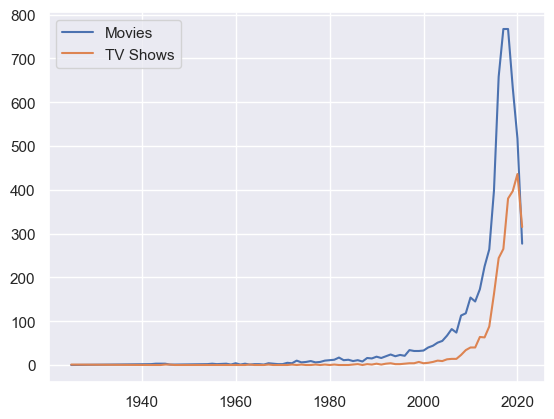

In [27]:
plt.plot(release_year_by_type["release_year"], release_year_by_type["Movie"], label="Movies")
plt.plot(release_year_by_type["release_year"], release_year_by_type["TV Show"], label="TV Shows")
plt.legend()
plt.show()

### 7. Check for trend in the duration of netflix titles over the years

In [28]:
df["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [29]:
df["duration_mins"] = df["duration"].str.extract('(\d+)').astype("float")

In [30]:
df["duration_mins"].value_counts()

duration_mins
1.0      1793
2.0       425
3.0       200
90.0      152
94.0      146
         ... 
189.0       1
273.0       1
212.0       1
224.0       1
191.0       1
Name: count, Length: 210, dtype: int64

In [31]:
df["duration_mins"] = df["duration_mins"].replace({1.0:500, 2.0:1000, 3.0:1500})

In [32]:
df[df["duration_mins"] == 18.0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_mins
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18.0


In [33]:
duration_by_year = df.groupby("release_year")["duration_mins"].mean().reset_index()

duration_by_year

,release_year,duration_mins
0,1925,500.000000
1,1942,35.000000
2,1943,62.666667
3,1944,52.000000
4,1945,163.500000
...,...,...
69,2017,219.542192
70,2018,272.829991
71,2019,304.754369
72,2020,331.947534


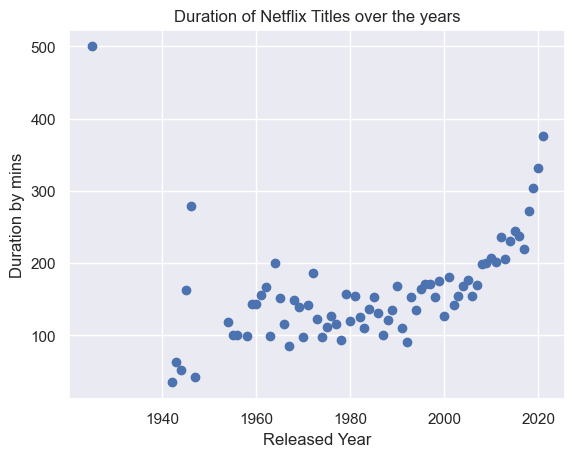

In [34]:
#create a scatterplot

plt.scatter(duration_by_year["release_year"], duration_by_year["duration_mins"])
plt.title("Duration of Netflix Titles over the years")
plt.xlabel("Released Year")
plt.ylabel("Duration by mins")
plt.show()